In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\prisc\Documents\DG3NLP_Priscilla\Code\data\raw_data.csv")
print(df.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [4]:
#Checking for missing values
df.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
#Checking for class imbalance 
x = df.drop(['label'], axis=1)
y = df['label']

y.value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

<Axes: ylabel='count'>

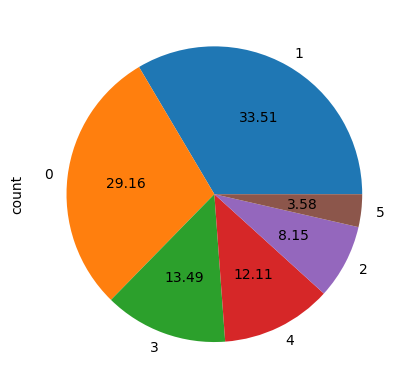

In [8]:
#Show pie plot of imbalance
y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
label_map = {
    0: 'Anger',
    1: 'Fear',
    2: 'Joy',
    3: 'Love',
    4: 'Sadness',
    5: 'Surprise'
}

# 2. A new column named 'emotion_name' is created to see the words
df['emotion_name'] = df['label'].map(label_map)


# 3. Looking at a random sample of 10 tweets to check if they make sense
pd.set_option('display.max_colwidth', None) 
print(df[['text', 'label', 'emotion_name']].sample(10))

                                                                                                                                                                               text  \
1217                                                                                                             i want to say that i feel vulnerable writing and sharing this info   
8439   i know that the amount of control i feel i need to have over my life is over the top so i continue to work at keeping faith and trusting that life is unfolding as it should   
4828                                                                                                                                                i feel deeply and truly content   
10661                                                                                                                                                   i feel a strange disconnect   
7532                                                                                 

In [ ]:
# The previous mapping was not correct based on data analysis the code mapping below is correct
label_map = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}
df['emotion_name'] = df['label'].map(label_map)

# Check the samples
print(df[['text', 'label', 'emotion_name']])

                                                                                                               text  \
0                                                                                           i didnt feel humiliated   
1      i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake   
2                                                                  im grabbing a minute to post i feel greedy wrong   
3                      i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                              i am feeling grouchy   
...                                                                                                             ...   
15995         i just had a very brief time in the beanbag and i said to anna that i feel like i have been beaten up   
15996        i am now turning and i feel patheti

In [ ]:
import re 
import string

def clean_tweet(text): 
    # 1. Converting text into lowercase
    text = text.lower()
    # 2. Removing hyperlinks
    text = re.sub(r'https?://\S+|www\.\S+', "", text)
    # 3. Removing hashtags (just the symbol)
    text = re.sub(r'#', '', text)
    # 4. Removing old style "RT"
    text = re.sub(r'^rt[\s]+', '', text)
    # 5. Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # 6. Removing Punctuation 
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 7. Removing extra whitespace (optional but good)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# 1. Creating a new column 'clean_text'
df['clean_text'] = df['text'].apply(clean_tweet)

# Checking for the results
print(df[['text', 'clean_text']].head())

                                                                                                           text  \
0                                                                                       i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake   
2                                                              im grabbing a minute to post i feel greedy wrong   
3                  i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                          i am feeling grouchy   

                                                                                                     clean_text  
0                                                                                       i didnt feel humiliated  
1  i can go from feeling so hopeless to so damned hopeful just from being around 

In [ ]:
#perform tokenization 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

tokenized_corpus = [word_tokenize(text) for text in df['clean_text']]
print(tokenized_corpus[:5]) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prisc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['i', 'didnt', 'feel', 'humiliated'], ['i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned', 'hopeful', 'just', 'from', 'being', 'around', 'someone', 'who', 'cares', 'and', 'is', 'awake'], ['im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong'], ['i', 'am', 'ever', 'feeling', 'nostalgic', 'about', 'the', 'fireplace', 'i', 'will', 'know', 'that', 'it', 'is', 'still', 'on', 'the', 'property'], ['i', 'am', 'feeling', 'grouchy']]


In [54]:
#Remove stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
words_to_keep = {
    'not', 'no', 'nor', 'never', 'neither', 
    'but', # Contrast
    # NLTK specific negation contractions (don't -> don)
    'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
    'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
    'wouldn', "wouldn't", 'shouldn', "shouldn't"
}

# 3. Remove them from the stopword set
# This asks: "Remove the intersection of stop_words and words_to_keep"
stop_words = stop_words - words_to_keep

def remove_stopwords(text):
    # A. Tokenize (Split sentence into words)
    words = word_tokenize(text)
    
    # B. Filter out the stopwords
    filtered_words = [w for w in words if w not in stop_words]
            
    # C. Join back into a string (e.g., "i feel happy")
    return " ".join(filtered_words)

# 3. create a specific column for Baseline
print("Removing stopwords...")
df['text_for_baseline'] = df['clean_text'].apply(remove_stopwords)

# 4. Check the result
print(df[['clean_text', 'text_for_baseline']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prisc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing stopwords...
                                                                                                     clean_text  \
0                                                                                       i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake   
2                                                              im grabbing a minute to post i feel greedy wrong   
3                  i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                          i am feeling grouchy   

                                               text_for_baseline  
0                                          didnt feel humiliated  
1  go feeling hopeless damned hopeful around someone cares awake  
2                      im grabbing minute post feel greedy wrong  
3           ever fe

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Performing stemminization
stemmer = PorterStemmer()

# Defining a function to handle the tokenization loop
def stem_text(text):
    # Split sentence into words
    tokens = word_tokenize(text)
    # Stem each word
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Join back into a string
    return " ".join(stemmed_tokens)

# Applying and creating a new column 
print("Applying Stemming...")
df['stemmed_text'] = df['clean_text'].apply(stem_text)

# Checking the results
print(df[['clean_text', 'stemmed_text']].head)

Applying Stemming...
<bound method NDFrame.head of                                                                                                          clean_text  \
0                                                                                           i didnt feel humiliated   
1      i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake   
2                                                                  im grabbing a minute to post i feel greedy wrong   
3                      i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                              i am feeling grouchy   
...                                                                                                             ...   
15995         i just had a very brief time in the beanbag and i said to anna that i feel like i have been beaten up 

In [ ]:
from nltk.stem import WordNetLemmatizer
#Performing lemminization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized_tokens)

print("Applying Lemmatization to the stopword-removed text...")
df['text_for_baseline'] = df['text_for_baseline'].apply(lemmatize_text) 

print(df[['clean_text', 'text_for_baseline']].head())

Applying Lemmatization to the stopword-removed text...
                                                                                                     clean_text  \
0                                                                                       i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake   
2                                                              im grabbing a minute to post i feel greedy wrong   
3                  i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                          i am feeling grouchy   

                                                                                             text_for_baseline  
0                                                                                      i didnt feel humiliated  
1  i can go from feeling so 

In [ ]:
# Saving both vesrions of the datasets
# 'clean_text' -> Use is for the Advanced Model (Notebook 03)
# 'text_for_baseline' is for the Baseline Model (Notebook 02)
output_df = df[['clean_text', 'text_for_baseline', 'label']]

output_df.to_csv("data/train_cleaned.csv", index=False)
print("Saved")

Saved! You are ready to start training.
